In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
from PIL import Image
plt.style.use('seaborn')
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import files as FILE

**Exploring Dataset and converting it to dataframe that contains:**
- image's relative path 
- Class (Football, Tennis, ..etc)
- Label is (according to the competition description) the predicted class and should be one of the following values: 0,1,2,3,4,5.


In [3]:
directory = '/content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Train/'
d=[]

for filename in os.listdir(directory):
    path = os.path.join(directory, filename)
    SportName=filename.split("_")[0]
    labelImg=-1
    if(SportName=="Basketball"):
      labelImg=0
    elif(SportName=="Football"):
      labelImg=1
    elif(SportName=="Rowing"):
      labelImg=2
    elif(SportName=="Swimming"):
      labelImg=3
    elif(SportName=="Tennis"):
      labelImg=4
    elif(SportName=="Yoga"):
      labelImg=5
    else:
      continue
    d.append(
        {
            'Path': path,
            'Class': SportName,
            'Label':labelImg,
        }
    )
df= pd.DataFrame(d)

In [4]:
df

,Path,Class,Label
0,/content/drive/MyDrive/NN Dataset.zip (Unzippe...,Yoga,5
1,/content/drive/MyDrive/NN Dataset.zip (Unzippe...,Yoga,5
2,/content/drive/MyDrive/NN Dataset.zip (Unzippe...,Yoga,5
3,/content/drive/MyDrive/NN Dataset.zip (Unzippe...,Yoga,5
4,/content/drive/MyDrive/NN Dataset.zip (Unzippe...,Yoga,5
...,...,...,...
2116,/content/drive/MyDrive/NN Dataset.zip (Unzippe...,Basketball,0
2117,/content/drive/MyDrive/NN Dataset.zip (Unzippe...,Basketball,0
2118,/content/drive/MyDrive/NN Dataset.zip (Unzippe...,Basketball,0
2119,/content/drive/MyDrive/NN Dataset.zip (Unzippe...,Basketball,0


**Plotting Histogram on "Label" column to see the frequency of each Label**

In [5]:
def printHistogram():
  data=df['Label']
  n, bins, patches = plt.hist(x=data, bins='auto', color='#0504aa',
                              alpha=0.7, rwidth=0.85)
  plt.grid(axis='y', alpha=0.75)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.title('Histogram of Frequency')

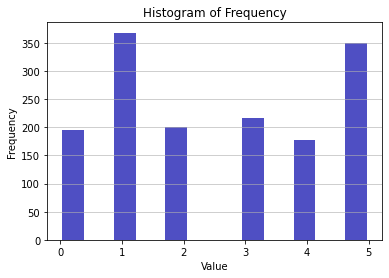

In [ ]:
printHistogram()

**We concluded that there are actually Class imbalance**

We could do further step in checking duplicate images





---



In [6]:
! pip install duplicate_images

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Checking For Duplicate images through this command
, ref="https://github.com/lene/DuplicateImages"

In [ ]:
!find-dups '/content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Train/'

03:26:09 INFO: Scanning Train/
03:26:38 INFO: 1681 total files
03:26:38 INFO: Computing image hashes
03:26:38 INFO: No persistent storage for calculated image hashes set up
03:26:54 INFO: 1681 hashes calculated
03:26:54 INFO: Filtering duplicates
03:27:06 INFO: 182 matches
/content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Train/Football_102.jpg /content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Train/Football_385.jpg
/content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Train/Football_104.jpg /content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Train/Football_334.jpg
/content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Train/Football_115.jpg /content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Train/Football_177.jpg
/content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Train/Football_13.jpg /content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Train/Football_235.jpg
/content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Train/Football_130.jpg /content/drive/MyDrive/NN

**This command returned 182 matches (pair of duplicate images) in "Train" folder**

**We could check this by printing pair of images to validate that they're duplicates**

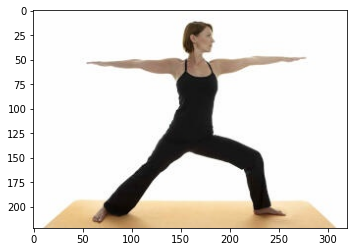

In [ ]:
# Displaying 1st image
image1= cv2.imread('/content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Train/Yoga_110.jpg')
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

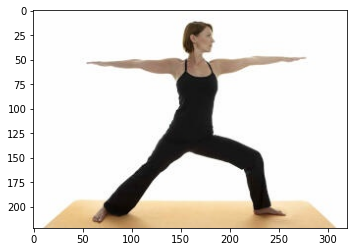

In [ ]:
# Displaying 2nd image
image2= cv2.imread('/content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Train/Yoga_43.jpg')
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

**Those are completely different image files (Yoga_110 & Yoga_43) But they're duplicates**

**We should then remove those duplicates**

In [ ]:
!find-dups '/content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Train/' --on-equal delete-bigger

15:45:02 INFO: Scanning Train/
15:45:06 INFO: 1678 total files
15:45:06 INFO: Computing image hashes
15:45:06 INFO: No persistent storage for calculated image hashes set up
15:45:19 INFO: 1678 hashes calculated
15:45:19 INFO: Filtering duplicates
15:45:30 INFO: 155 matches
15:45:30 INFO: Deleted Train/Basketball_155 (197).jpg
15:45:30 INFO: Deleted Train/Basketball_155 (208).jpg
15:45:30 INFO: Deleted Train/Basketball_155 (302).jpg
15:45:30 INFO: Deleted Train/Basketball_155 (304).jpg
15:45:30 INFO: Deleted Train/Basketball_155 (305).jpg
15:45:30 INFO: Deleted Train/Basketball_155 (306).jpg
15:45:30 INFO: Deleted Train/Basketball_155 (307).jpg
15:45:30 INFO: Deleted Train/Basketball_155 (308).jpg
15:45:30 INFO: Deleted Train/Basketball_155 (309).jpg
15:45:30 INFO: Deleted Train/Basketball_155 (310).jpg
15:45:30 INFO: Deleted Train/Basketball_155 (209).jpg
15:45:30 INFO: Deleted Train/Basketball_155 (311).jpg
15:45:30 INFO: Deleted Train/Basketball_155 (312).jpg
15:45:30 INFO: Deleted T

**After removing duplicates, We make sure that there's no duplicates again, Produces (0 matches)**

In [7]:
!find-dups '/content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Train/'

23:40:10 INFO: Scanning Train/
23:41:03 INFO: 2121 total files
23:41:03 INFO: Computing image hashes
23:41:03 INFO: No persistent storage for calculated image hashes set up
23:41:20 INFO: 2121 hashes calculated
23:41:20 INFO: Filtering duplicates
23:41:38 INFO: 0 matches


Since we still have class imbalance we would increase our dataset by **Data Augmentation**

In [ ]:
sw= df[df['Class']=="Swimming"].head(150).reset_index(drop=True)
num=181
i=180
while(i<200):
  loaded_img = cv2.imread(sw.iloc[i]['Path'])
  loaded_img = cv2.cvtColor(loaded_img,cv2.COLOR_BGR2RGB)
 
  # Apply sharpenning kernel and flipping then save image
  # Sharpen_Kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
  # Sharpen_Effect_Img = cv2.filter2D(src=loaded_img, kernel=Sharpen_Kernel, ddepth=-1)
  Blur_Effect_Img = cv2.GaussianBlur(loaded_img, (35, 35), 0)
  Blur_Effect_Img = cv2.flip(Blur_Effect_Img, 0)
  Blur_Effect_Img=  cv2.cvtColor(Blur_Effect_Img,cv2.COLOR_BGR2RGB)

  # =========================================================
  fname= f'Swimming_{num}_uniqe'+'.jpg'
  cv2.imwrite(fname,Blur_Effect_Img)
  # download
  FILE.download(fname)
  num+=1
  i+=1

In [10]:
df

,Path,Class,Label
0,/content/drive/MyDrive/NN Dataset.zip (Unzippe...,Yoga,5
1,/content/drive/MyDrive/NN Dataset.zip (Unzippe...,Yoga,5
2,/content/drive/MyDrive/NN Dataset.zip (Unzippe...,Yoga,5
3,/content/drive/MyDrive/NN Dataset.zip (Unzippe...,Yoga,5
4,/content/drive/MyDrive/NN Dataset.zip (Unzippe...,Yoga,5
...,...,...,...
2116,/content/drive/MyDrive/NN Dataset.zip (Unzippe...,Basketball,0
2117,/content/drive/MyDrive/NN Dataset.zip (Unzippe...,Basketball,0
2118,/content/drive/MyDrive/NN Dataset.zip (Unzippe...,Basketball,0
2119,/content/drive/MyDrive/NN Dataset.zip (Unzippe...,Basketball,0


**Printing Histogram again**

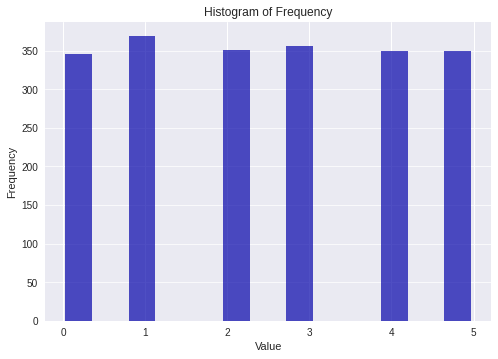

In [8]:
printHistogram()

In [ ]:
# def PreprocessImage(imagePath):



In [ ]:
# im = Image.open(r'/content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Train/Swimming_159.png')
# rgb_im = im.convert('RGB')
# # rgb_im.save('colors.jpg')
# plt.imshow(im)